En este codigo cargamos los datos de los usuarios y la idea es distinguir niveles en los cuales el usuario entendio y pudo reconocer la tarea y niveles donde no. El criterio para eso va a ser, primero establecer un nivel critico que separe ambas zonas a partir de un grafico de n>i en funcion de i donde i es la performance.

Una vez obtenido ese parametro, hacer cuadros de contingencia ¿? ¿Tipo fisher? para ver que cosas son estadisticas y cuales no. 

In [2]:
# Importamos las cosas usuales

%matplotlib inline
%load_ext autoreload
%autoreload 2
from scripts.db import *
from scripts.plots import *
from scripts.stats import *
from scripts.statsTransferencia import *

In [6]:
# Cargamos los datos:

import pandas as pd

resumen = dataNumerica()
data = pd.DataFrame.from_dict(resumen, orient='index')

#Trasnformamos los valores que interesan en columnas (Por ahora voy a hacer todo en angulos)
dataTest = pd.DataFrame()
for i, col in enumerate(["P30", "P60", "P120","P150","A30","A60","A120","A150"]):
    dataTest["I"+col] = data['TestInicialAngulos'].map(lambda x: x[i])
for i, col in enumerate(["P30", "P60", "P120","P150","A30","A60","A120","A150"]):
    dataTest["F"+col] = data['TestFinalAngulos'].map(lambda x: x[i]) 
    

/home/ionatan/Gits/IPyVisound/scripts/statsTransferencia.py:536: SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame
  dataByAlias[cts.P_FaseActiva].replace('ExperimentoCompleto', 'TestFinal', inplace=True)
/home/ionatan/Gits/IPyVisound/scripts/statsTransferencia.py:508: SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame
  dataByAlias[cts.P_OrientacionEntrenamiento].replace('A30', 'P30', inplace=True)
/home/ionatan/Gits/IPyVisound/scripts/statsTransferencia.py:510: SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame
  dataByAlias[cts.P_OrientacionEntrenamiento].replace('P30', 'CONTROL', inplace=True)


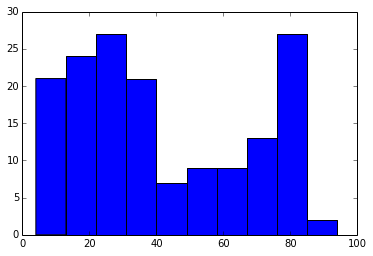

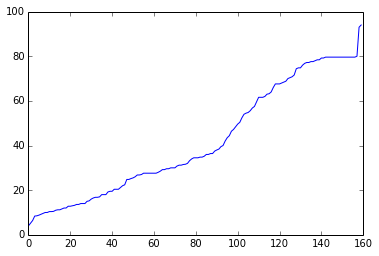

In [44]:
# Transformamos los datosa enuna larga serie
import matplotlib.pyplot as plt

datos = []
columnasIP = ['IP30', 'IP60', 'IP120', 'IP150']
columnasIA = ['IA30', 'IA60', 'IA120', 'IA150']
columnasFP = ['FP30', 'FP60', 'FP120', 'FP150']
columnasFA = ['FP30', 'FA60', 'FA120', 'FA150']

columnas = columnasIP + columnasFP + columnasIA + columnasFA
for columna in columnas:
    datos = datos + [value for value in dataTest[columna]]
    
acumulados = []
for i in range(int(max(datos)+1)):
    acumulados = acumulados + [sum(1 if x<=i else 0 for x in datos)]

plt.hist(datos)
plt.show()    
plt.plot(range(len(datos)), sorted(datos))

In [37]:
dataTest.columns

Index(['IP30', 'IP60', 'IP120', 'IP150', 'IA30', 'IA60', 'IA120', 'IA150', 'FP30', 'FP60', 'FP120', 'FP150', 'FA30', 'FA60', 'FA120', 'FA150'], dtype='object')